# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 2: Youtube trending page analysis

## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Thuy Hong Doan
    - Email: td688@drexel.edu
- Group member 
    - Name: Alsulami Meznah
    - Email: mha54@drexel.edu

## Cleaning Youtube trending dataset 

Before starting the anaylsis, it is important to clean the dataset that the project relies on. The project cleaning consisted of: 
- Finding and deleting rows with a missing values, which were mainly in the Description column. 
- Replacing NaN in description with space.
- Deleting rows with comments_disabled=True or ratings_disabled=True.
- Fixing the Tags column,by Replacing "[None]" with space, and spliting tags with '|' and convert list to one string.
- Dropping duplicates rows in video id column.
- Converting date columns 'publishedAt', 'trending_date' to datetime type.
- Reseting indexing of the dataframe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

US_category_id = pd.read_json('data/US_category_id.json')
trending_youtube = pd.read_csv('data/US_youtube_trending_data.csv')


In [2]:
# getting information about the dataset
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180990 entries, 0 to 180989
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           180990 non-null  object
 1   title              180990 non-null  object
 2   publishedAt        180990 non-null  object
 3   channelId          180990 non-null  object
 4   channelTitle       180990 non-null  object
 5   categoryId         180990 non-null  int64 
 6   trending_date      180990 non-null  object
 7   tags               180990 non-null  object
 8   view_count         180990 non-null  int64 
 9   likes              180990 non-null  int64 
 10  dislikes           180990 non-null  int64 
 11  comment_count      180990 non-null  int64 
 12  thumbnail_link     180990 non-null  object
 13  comments_disabled  180990 non-null  bool  
 14  ratings_disabled   180990 non-null  bool  
 15  description        176978 non-null  object
dtypes: bool(2), int64(5)

In [3]:
# cleaning dataset 
# number of null values in the dataset
trending_youtube.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4012
dtype: int64

The description column has all null values. These are some of the rows whose description values are null.

In [4]:
trending_youtube[trending_youtube["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
223,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
249,NYXABBpPJss,When you get on the grill for your friends Bir...,2020-08-12T04:36:57Z,UCI8hY4ummWDZgFSjxU_HFNQ,Jeremiah Phillips,23,2020-08-13T00:00:00Z,[None],193157,9057,148,666,https://i.ytimg.com/vi/NYXABBpPJss/default.jpg,False,False,NaN
446,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69610,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN


In [5]:
# Replace NaN in description with space
trending_youtube["description"].fillna(" ", inplace=True)
# Delete all rows with a missing values if any
trending_youtube.dropna(inplace=True)

In [6]:
# checking for the NAN values
trending_youtube.isnull().sum().sum()

0

In [7]:
trending_youtube.shape

(180990, 16)

Since our main focus is to find factors that effect the trending of a video, any videos with disbaled comments of ratings will be exculded from our project.

In [8]:
# delete rows with comments_disabled=True or ratings_disabled=True
trending_youtube = trending_youtube[(trending_youtube['comments_disabled'] == False) &
                    (trending_youtube['ratings_disabled'] == False)]
trending_youtube.shape

(177598, 16)

In [9]:
trending_youtube["tags"].head(10)

0    brawadis|prank|basketball|skits|ghost|funny vi...
1    Apex Legends|Apex Legends characters|new Apex ...
2    jacksepticeye|funny|funny meme|memes|jacksepti...
3    xxl freshman|xxl freshmen|2020 xxl freshman|20...
4    The LaBrant Family|DIY|Interior Design|Makeove...
5    Professor injury|professor achilles|professor ...
6                                               [None]
7                     cgpgrey|education|hello internet
8    surprising|dad|father|papa|with|dream|car|truc...
9    Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...
Name: tags, dtype: object

Tags columns is not comphrensive, that's why we need to convert "none" values into empty string and remove "|" to form one string for each row.

In [10]:
# Replace [None] in tags with space 
trending_youtube.loc[trending_youtube['tags'] == '[None]', 'tags'] = ' '
# split tags with '|' and convert list to one string
trending_youtube['tags'] = [' '.join(tag) \
                       for tag in trending_youtube['tags'].str.split('|')]

trending_youtube["tags"].head(10)

0    brawadis prank basketball skits ghost funny vi...
1    Apex Legends Apex Legends characters new Apex ...
2    jacksepticeye funny funny meme memes jacksepti...
3    xxl freshman xxl freshmen 2020 xxl freshman 20...
4    The LaBrant Family DIY Interior Design Makeove...
5    Professor injury professor achilles professor ...
6                                                     
7                     cgpgrey education hello internet
8    surprising dad father papa with dream car truc...
9    Vengo De Nada Aleman Ovi Big Soto Trap Ovi Nat...
Name: tags, dtype: object

There is a lot of duplicates rows in the dataset, where we can verify using video id column and unique() to get the real size of nonduplicates rows. That's any row with duplicate title and video id will be dropped from the dataset.

In [11]:
len(trending_youtube['video_id'].unique())

32577

In [12]:
len(trending_youtube['video_id'])

177598

In [13]:
# .drop_duplicates()
# these are the duplicate values with same video id
duplicates = trending_youtube[trending_youtube['video_id'].duplicated() == True]
duplicates

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
202,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13T00:00:00Z,brawadis prank basketball skits ghost funny vi...,3017834,183592,9506,41374,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
207,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-13T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2802823,401421,3728,44546,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
209,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-13T00:00:00Z,Apex Legends Apex Legends characters new Apex ...,2932421,153682,3281,17454,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
213,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-13T00:00:00Z,The LaBrant Family DIY Interior Design Makeove...,1922758,54959,1758,2662,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
214,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-13T00:00:00Z,xxl freshman xxl freshmen 2020 xxl freshman 20...,944498,29016,2809,9278,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180985,udIBOWYhoOc,RMU Exclusive: Bethune prez explains why he fi...,2023-01-24T04:04:47Z,UCjXB7nX8bL2U2sje8d212Yw,Roland S. Martin,25,2023-01-29T00:00:00Z,Roland Martin #RolandMartinUnfiltered Black St...,341921,5821,0,5022,https://i.ytimg.com/vi/udIBOWYhoOc/default.jpg,False,False,#RolandMartinUnfiltered Exclusive: Bethune Coo...
180986,InjrU5_MQB8,The Next Chapter.,2023-01-23T20:18:51Z,UCgUueMmSpcl-aCTt5CuCKQw,Grant Horvat Golf,17,2023-01-29T00:00:00Z,Golf GoodGood Grant Horvat GM Golf,456361,23430,0,2387,https://i.ytimg.com/vi/InjrU5_MQB8/default.jpg,False,False,My Socials:https://instagram.com/granthorvat/M...
180987,7lWUBIN7PNE,organizing our NEW KITCHEN + decor shopping | ...,2023-01-24T19:30:27Z,UCxVEsOhpjLTRKNUSA8e0mfA,"XO, MaCenna Vlogs",24,2023-01-29T00:00:00Z,vlogger xo macenna macenna diy macenna vlogs l...,255393,16301,0,921,https://i.ytimg.com/vi/7lWUBIN7PNE/default.jpg,False,False,I’ve been obsessed with Aurate jewelry for ove...
180988,3Sq1MPvP1-Q,The Undertaker Goes Sneaker Shopping With Complex,2023-01-23T15:00:02Z,UCE_--R1P5-kfBzHTca0dsnw,Complex,24,2023-01-29T00:00:00Z,sneakerhead complex complex originals sneakers...,813428,35545,0,2421,https://i.ytimg.com/vi/3Sq1MPvP1-Q/default.jpg,False,False,The Undertaker goes Sneaker Shopping at Concep...


There is almost 7 duplicates for a single video! since while collecting dataset, the video can remain in the trending page for a while so when collecting the dataset it will get the video multiple times but with different viewer count and comments and other variables. so when we drop our duplicates we make sure to leave the last time the video was trending. 

In [14]:
trending_youtube[trending_youtube['video_id'] == "J78aPJ3VyNs"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
207,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-13T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2802823,401421,3728,44546,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
442,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-14T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3136088,427609,4009,46133,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
657,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-15T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3309124,442555,4156,46699,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
909,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-16T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3384892,448809,4209,47003,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1159,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-17T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3439181,453464,4246,47188,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1399,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-18T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3490530,457130,4269,47291,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [15]:
len(duplicates['video_id'])

145021

In [16]:
trending_youtube.drop_duplicates(subset=['title','video_id'], keep='last' , inplace= True)

In [17]:
# last updated video before leaving the trending page
trending_youtube[trending_youtube['video_id'] == "J78aPJ3VyNs"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
1399,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-18T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3490530,457130,4269,47291,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [18]:
len(trending_youtube)

33590

Converting date columns from object to datetime type, to easily manipulate them in the analysis.

In [19]:
trending_youtube.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [20]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
13,2020-08-11T19:00:10Z,2020-08-12T00:00:00Z
58,2020-08-11T11:08:04Z,2020-08-12T00:00:00Z
172,2020-08-07T18:30:06Z,2020-08-12T00:00:00Z
173,2020-08-07T09:30:04Z,2020-08-12T00:00:00Z
174,2020-08-06T19:47:12Z,2020-08-12T00:00:00Z


In [21]:
#Trending date column has object data type which needs to changed as datetime
trending_youtube['trending_date'] = pd.to_datetime(trending_youtube['trending_date'], format = "%Y-%m-%dT%H:%M:%SZ")
#The publishedAt column converted with the astype function
trending_youtube['publishedAt'] = trending_youtube['publishedAt'].astype('datetime64[ns]')
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
13,2020-08-11 19:00:10,2020-08-12
58,2020-08-11 11:08:04,2020-08-12
172,2020-08-07 18:30:06,2020-08-12
173,2020-08-07 09:30:04,2020-08-12
174,2020-08-06 19:47:12,2020-08-12


In [22]:
trending_youtube[['trending_date','publishedAt']].dtypes

trending_date    datetime64[ns]
publishedAt      datetime64[ns]
dtype: object

Since we dropped rows and change few parts in the dataset, the indexing of the dataframe won't be coherent, we can simply reset it.

In [23]:
trending_youtube.index

Int64Index([    13,     58,    172,    173,    174,    175,    176,    177,
               178,    179,
            ...
            180980, 180981, 180982, 180983, 180984, 180985, 180986, 180987,
            180988, 180989],
           dtype='int64', length=33590)

In [24]:
trending_youtube.reset_index(drop=True, inplace=True)

In [25]:
trending_youtube.index

RangeIndex(start=0, stop=33590, step=1)

In [26]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33590 entries, 0 to 33589
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33590 non-null  object        
 1   title              33590 non-null  object        
 2   publishedAt        33590 non-null  datetime64[ns]
 3   channelId          33590 non-null  object        
 4   channelTitle       33590 non-null  object        
 5   categoryId         33590 non-null  int64         
 6   trending_date      33590 non-null  datetime64[ns]
 7   tags               33590 non-null  object        
 8   view_count         33590 non-null  int64         
 9   likes              33590 non-null  int64         
 10  dislikes           33590 non-null  int64         
 11  comment_count      33590 non-null  int64         
 12  thumbnail_link     33590 non-null  object        
 13  comments_disabled  33590 non-null  bool          
 14  rating

In [29]:
#creating dictionary for json file provided for category and category id
category_dict = {}
for i in US_category_id['items']:
    category_dict[i['id']] = i['snippet']['title']

In [30]:
#replacing the category id with category actual name 
def replace_categoryid(df):
    if str(df) in category_dict:
        return category_dict[str(df)]
    
trending_youtube['category'] = trending_youtube['categoryId'].apply(replace_categoryid)

In [31]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33590 entries, 0 to 33589
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33590 non-null  object        
 1   title              33590 non-null  object        
 2   publishedAt        33590 non-null  datetime64[ns]
 3   channelId          33590 non-null  object        
 4   channelTitle       33590 non-null  object        
 5   categoryId         33590 non-null  int64         
 6   trending_date      33590 non-null  datetime64[ns]
 7   tags               33590 non-null  object        
 8   view_count         33590 non-null  int64         
 9   likes              33590 non-null  int64         
 10  dislikes           33590 non-null  int64         
 11  comment_count      33590 non-null  int64         
 12  thumbnail_link     33590 non-null  object        
 13  comments_disabled  33590 non-null  bool          
 14  rating

## EDA

#### 1. What categories that youtube users in the US are interested in?

In [32]:
#Groupby and sum view count, likes, dislikes, comment_count  by category 
lst = ['view_count','likes','dislikes','comment_count','category']
category_group = trending_youtube[lst].groupby('category').sum()
category_group

,view_count,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,707827683,29292332,303007,2416743
Comedy,3233653382,226454731,2221489,10606038
Education,1677548721,91158491,911502,4969294
Entertainment,19975628646,949606941,10791895,57087827
Film & Animation,3288770975,134900276,1284913,8997815
Gaming,12707874639,636812388,7253253,45685185
Howto & Style,1447019696,69999732,1472522,4695396
Music,26411475050,1526689149,19983675,153471463
News & Politics,1835850452,25305055,1529512,6777888


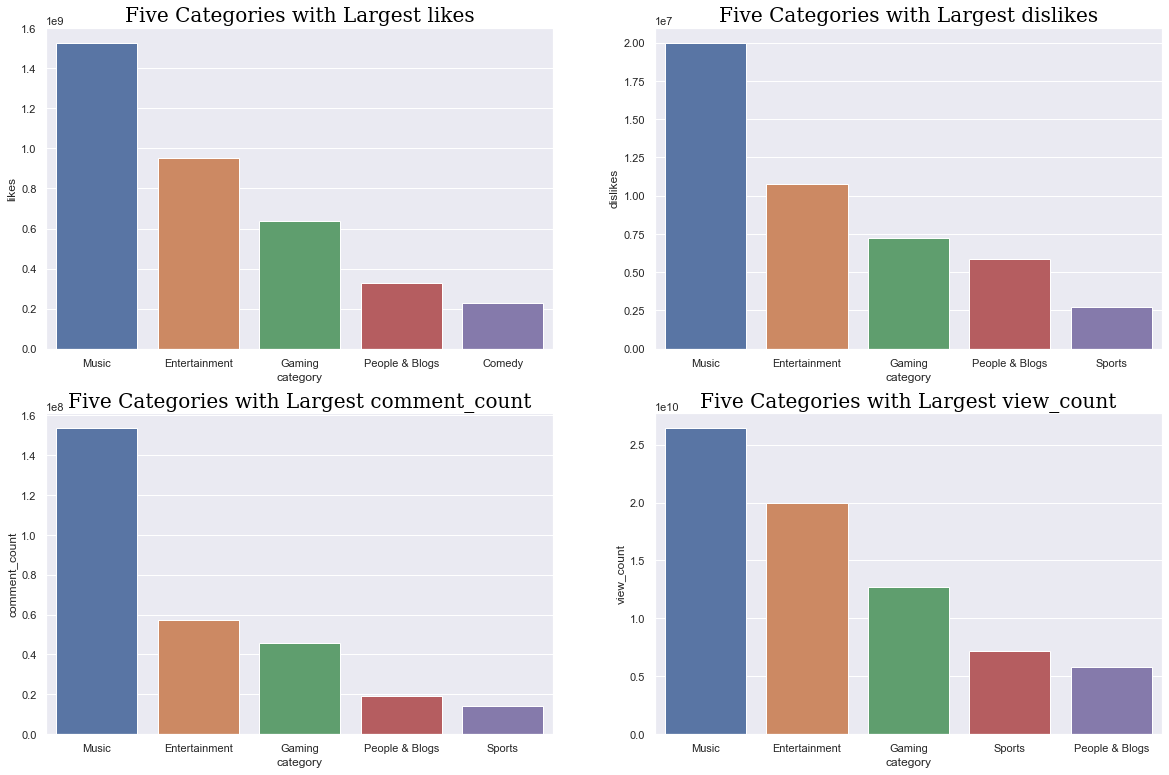

In [33]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','comment_count','view_count',]
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nlargest(5).index
    y = category_group[lst[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Largest " + lst[i]
    plt.title(title,font)

Based on the diagrams above, the categories that most youtube's users search for on Youtube are music, entertainment, gaming, people, and sports, respectively.

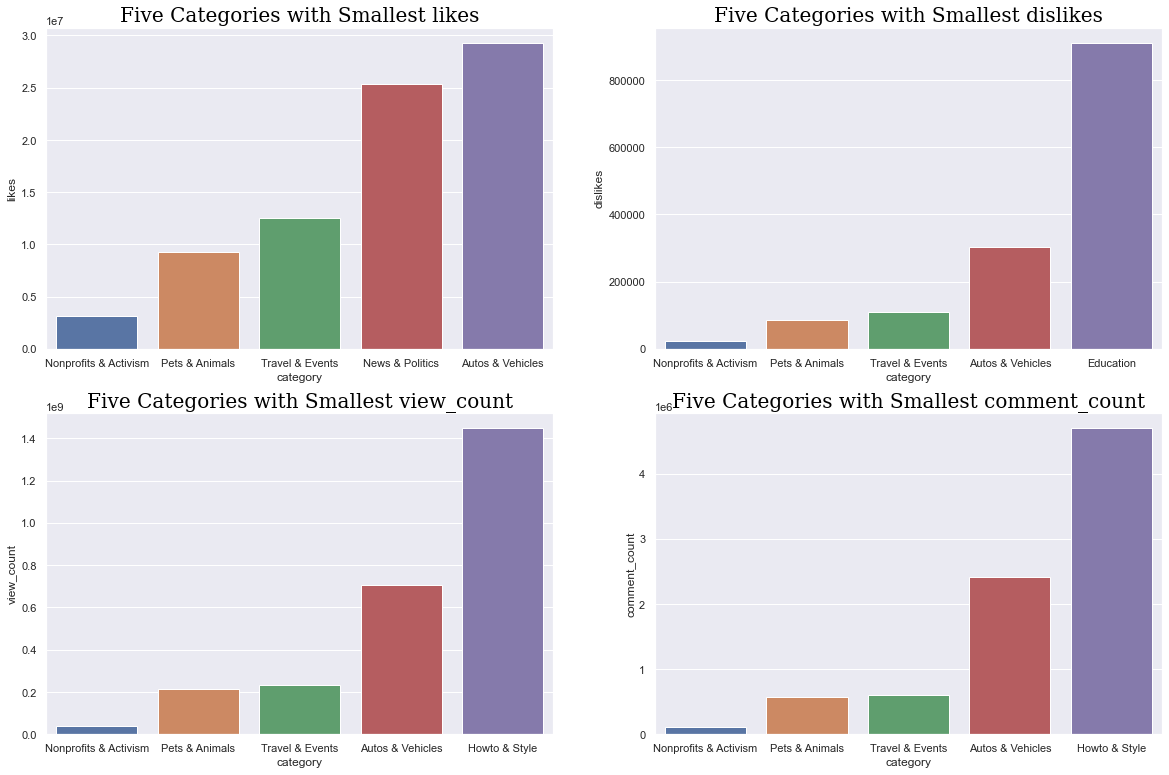

In [37]:
#Plotting the 5 categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','view_count','comment_count']
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nsmallest(5).index
    y = category_group[lst[i]].nsmallest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Smallest " + lst[i]
    plt.title(title,font)


Based on the diagrams above, youtube users are not interested much in the nonprofit, pet & animals, and travels category.